ЛУЧШИЙ способ избежать переобучения - увеличить набор тренировочных данных

САМЫЙ ПРОСТОЙ способ - уменьшить размерность сети. Это уменьшит количество изучаемых признаков. Уменьшиться и размер памяти, в который модель может сохранять "шаблоны", что орицательно влияет на общность.

Но если уменьшить слишком сильно, то модель будет недообучена. Важно найти компромисс между слишком большой и недостающе емкостью модели.

УСТАНОВКА ВСЕХ МОДУЛЕЙ


In [27]:
from keras.datasets import imdb
from keras.layers import Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import regularizers
import numpy as np

ЧТЕНИЕ ДАННЫХ

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


ВЕКТОРИЗАЦИЯ ДАННЫХ

In [3]:
# данные необходимо преобразовать в бинарную матрицу
# то есть например если есть массив [3,5], то он превратиться в вектор формы (n, 10 000), где
# все числа, кроме тех, которые на 3 и 5 позициях, будут нулями, а те - единицами.
def vectorize_sequences(sequences,dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# векторизуем метки
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
print("\n\n[INFO] PREPROCESSED DATA IS:")
print(f"train_data: \n{x_test}")
print(f"\ntest_data: \n{x_test}")
print(f"\ntrain_labels: \n{y_train}")
print(f"\ntest_labels: \n{y_test}")



[INFO] PREPROCESSED DATA IS:
train_data: 
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

test_data: 
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]

train_labels: 
[1. 0. 0. ... 0. 1. 0.]

test_labels: 
[0. 1. 1. ... 0. 0. 0.]


СОЗДАНИЕ МОДЕЛИ №1

In [5]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))# выводит вероятность

СОЗДАНИЕ МОДЕЛИ №2 (С МЕНЬШЕЙ ЕМКОСТЬЮ)

In [ ]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(10000,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

СОЗДАНИЕ МОДЕЛИ №3 (С ОЧЕНЬ БОЛЬШОЙ ЕМКОСТЬЮ)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10000,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

КОМПИЛЯЦИЯ МОДЕЛИ

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

ТРЕНИРОВКА МОДЕЛИ

In [7]:
partial_x_train = x_train[10_000:]
partial_y_train = y_train[10_000:]

check_x_train = x_train[:10_000]
check_y_train = y_train[:10_000]

history = model.fit(partial_x_train, partial_y_train, validation_data=(check_x_train, check_y_train), epochs=20, batch_size=512)

old_history = history.history

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5188 - accuracy: 0.7849 - val_loss: 0.3866 - val_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3079 - accuracy: 0.8993 - val_loss: 0.3077 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2242 - accuracy: 0.9276 - val_loss: 0.2814 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1766 - accuracy: 0.9408 - val_loss: 0.3090 - val_accuracy: 0.8740
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1426 - accuracy: 0.9541 - val_loss: 0.2938 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1137 - accuracy: 0.9657 - val_loss: 0.3050 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0965 - accuracy: 0.9699 - val_loss: 0.3142 - val_accuracy: 0.8818
Epoch 8/20
30

ФУНКЦИЯ РИСУЕТ ГРАФИКИ

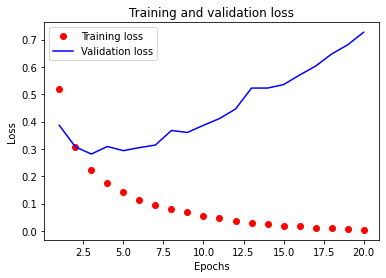

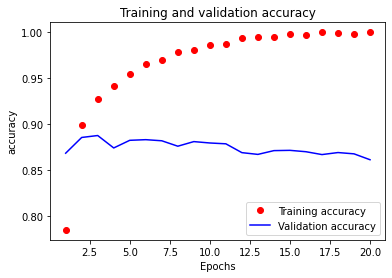

In [8]:
# функция строит графики после тренировки
def draw_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    #               ГРАФИКИ ПОТЕРЬ
    # синими точками рисуется график потерь на этапе обучения
    plt.plot(epochs, loss_values, 'or', label='Training loss')
    # синей линией рисуется график потерь на этапе проверки
    plt.plot(epochs, validation_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # очищаем рисунок
    plt.clf()

    #               ГРАФИКИ ОШИБКИ
    acc_values = history['accuracy']
    validation_acc_values = history['val_accuracy']
    plt.plot(epochs, acc_values, 'or', label='Training accuracy')
    plt.plot(epochs, validation_acc_values, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()



# рисуем все графики
draw_graph(old_history)

ЧЕМ МЕНЬШЕ МОДЕЛЬ, ТЕМ ДОЛЬШЕ НЕ НАСТУПАЕТ ПЕРЕОБУЧЕНИЕ

ДОБАВИМ РЕГУЛЯРИЗАЦИЮ ВЕСОВ

In [9]:
# Простая модель - это модель, в которой помимо всего прочего распределение весов 
# будет равномерным. Чтобы оно стало равномерным, необходимо ограничить весовые
# коэффициенты. Для этого используются регуляризаторы 2ух видов:
# L1 регуляризация - вводится штраф за увеличение весов, пропорциональный модулям
# весов
# L2 регуляризация - вводится штраф за увеличение весов, пропорциональный квадратам
# весов

model = Sequential()
# l2(0.001) значит, что каждый коэффициент в матрице весов слоя будет добавлять 
# 0.001 от самого себя в общее значение потерь сети
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

КОМПИЛЯЦИЯ МОДЕЛИ

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

ТРЕНИРОВКА МОДЕЛИ

In [11]:
history = model.fit(partial_x_train, partial_y_train, validation_data=(check_x_train, check_y_train), epochs=20, batch_size=512)
history = history.history


Epoch 1/20
30/30 [==============================] - 1s 46ms/step - loss: 0.5567 - accuracy: 0.7901 - val_loss: 0.4301 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3559 - accuracy: 0.8973 - val_loss: 0.3733 - val_accuracy: 0.8696
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2867 - accuracy: 0.9194 - val_loss: 0.3730 - val_accuracy: 0.8644
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2523 - accuracy: 0.9307 - val_loss: 0.3337 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2347 - accuracy: 0.9375 - val_loss: 0.3612 - val_accuracy: 0.8745
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2166 - accuracy: 0.9459 - val_loss: 0.3409 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2006 - accuracy: 0.9525 - val_loss: 0.3421 - val_accuracy: 0.8842
Epoch 8/20
30

ФУНКЦИЯ ВЫВОДИТ ГРАФИКИ ДВУХ МОДЕЛЕЙ

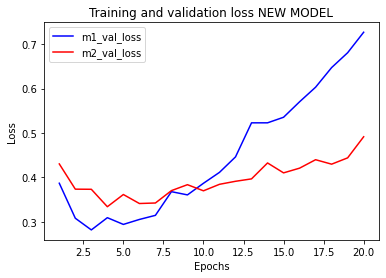

In [16]:
# функция строит графики после тренировки
def draw_graph(history_1, history_2):
    validation_loss_values_1 = history_1["val_loss"]

    epochs = range(1, len(history_1['loss']) + 1)

    #               МОДЕЛЬ 1
    #               ГРАФИКИ ПОТЕРЬ - СИНИМ
    plt.plot(epochs, validation_loss_values_1, 'b', label='m1_val_loss')
    plt.title('Training and validation loss OLD MODEL')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')


    #               МОДЕЛЬ 2 
    #               ГРАФИКИ ПОТЕРЬ - КРАСНЫМ
    validation_loss_values_2 = history_2["val_loss"]
    plt.plot(epochs, validation_loss_values_2, 'r', label='m2_val_loss')
    plt.title('Training and validation loss NEW MODEL')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.legend()
    plt.show()


# рисуем все графики
draw_graph(old_history, history)

ЗАМЕТНО, ЧТО ПОСЛЕ ДОБАВЛЕНИЯ РЕГУЛЯРИЗАЦИИ ПОТЕРЯ НА ВАЛИДАЦИИ РАСТЕТ МЕДЛЕНЕЕ, ЧТО ГОВОРИТ О БОЛЕЕ МЕДЛЕННОМ ПЕРЕОБУЧЕНИИ

ДОБАВЛЕНИЕ ПРОРЕЖИВАНИЯ

In [28]:
# прореживание - обнуление случайно выбранных признаков на обучениии
# это помогает справиться с переобучением
# введение "шума" в выходные значения может разбить "шаблоны", которые создаются
# в сетке припереобучении
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5)) # коэффициент показывает сколько процентов обнуляется
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(partial_x_train, partial_y_train, validation_data=(check_x_train, check_y_train), epochs=20, batch_size=512)
history = history.history


Epoch 1/20
30/30 [==============================] - 3s 99ms/step - loss: 0.6303 - accuracy: 0.6439 - val_loss: 0.5277 - val_accuracy: 0.8224
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5134 - accuracy: 0.7641 - val_loss: 0.3999 - val_accuracy: 0.8725
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4262 - accuracy: 0.8215 - val_loss: 0.3420 - val_accuracy: 0.8819
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3601 - accuracy: 0.8566 - val_loss: 0.3128 - val_accuracy: 0.8777
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3121 - accuracy: 0.8833 - val_loss: 0.2820 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2691 - accuracy: 0.9031 - val_loss: 0.2858 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2406 - accuracy: 0.9159 - val_loss: 0.2760 - val_accuracy: 0.8877
Epoch 8/20
30

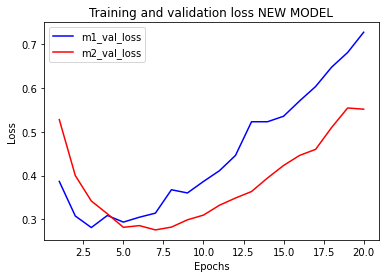

In [31]:
draw_graph(old_history, history)